# Part I - Exploration of Ford GoBike System Dataset
## by Sachindra Cooray

## Introduction

This collection of data covers individual bike rides within the bike-sharing system operating  across the San Francisco Bay Area.

We try to find insight into the following details from the bike rental dataset.

1. Relationships related to rental duration 
2. How does Gender/Age play a role in the rentals
3. Which start points/end points are more popular
4. Changes to rental patterns according to Customers or subscribers

In Part 1 we try to conduct an exploratory analysis of the dataset and find out interesting patterns and information.


## Preliminary Wrangling

Initial step will be to import all the required packages to run the program. Then we load the data and take a look at the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


In [2]:
# load the data set
df = pd.read_csv('201902-fordgobike-tripdata.csv')


Afterward, we conduct some preliminary analysis to get some details about the coverage of the dataset and the size.

In [3]:
# read the top 5 lines of the dataset
df.head(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# use shape to size of the dataset
df.shape

(183412, 16)

In [5]:
# nunique() provides details bout the unique values in each data field
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
# .info() provides more details about the count of non-null values and the data type in each field
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# describe provides other statistical information about the data fields
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


From the above investigations, we can get an idea about how big the data is, what fields are present, value rangers, the empty fields present, and data types.

### What is the structure of your dataset?

From the information we gathered above, it is seen that the bike dataset contains 183,412 entries over 16 columns.

The fields in the dataset are as follows;
1. `duration_sec`: Total duration of the bike ride
2. `start_time`: Starting date and time for the bike ride
3. `end_time`: Ending date and time for the bike ride
4. `start_station_id`: Point where the ride begins
5. `start_station_name`: Name of the station name at the start
6. `start_station_lattitude`: Start point latitude
7. `start_station_longitude`: Start point longitude
8. `end_station_id`: Point where the ride ends
9. `end_station_name`: Name of the station name at the end
10. `end_station_lattitude`: End point latitude
11. `end_station_longitude`: End point longitude
12. `bike_id`: Number of the bike
13. `user_type`: Subscriber is a  frequent user with a subscription plan, and customer is an occasional user who buys single rides
14. `member_birth_year`: Birth year for the customer
15. `member_gender`: Male, female or other
16. `bike_share_for_all_trip`: YES or NO


### Data cleaning

#### 1. Drop missing Values

From the previous analysis is it seen that there are quite a number of missing values in the dataset. Therefore, we will be dropping those rows with missing values. SInce our data set is considerably large drooping those rows will not have a significant effect on the overall data set.

In [8]:
# drop missing values
df.dropna(inplace=True)

# Test
df.isnull().any().sum()

0

#### 2. Convert `start_time` and `end_time` to datetime format

In [9]:
# Convert start_time and end_time to datetime format
df = df.assign(
    start_time=pd.to_datetime(df['start_time']),
    end_time=pd.to_datetime(df['end_time']))

### What is/are the main feature(s) of interest in your dataset?

According to the preliminary analysis of the dataset, the main features of  interest are, trip duration, start and end points, gender and age of users, user type, and whether the users used bike sharing for the whole trip. 

These features will help us understand the patterns and characteristics about the users for bike sharing.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think start_time in the dataset will be leading to support my investigations for the rest of the features of interest. This information will provide me with details about the day of the week and the time of the day.

## Data Exploration and Visualization

## 1. Univariate Exploration 

We try to look into the distribution of individual variables in this section of the project.

## Univariate Exploration

The initial investigation is to look into the gender distribution of the ones renting bikes. We use seaborn's count plot to visualize this data as follows.

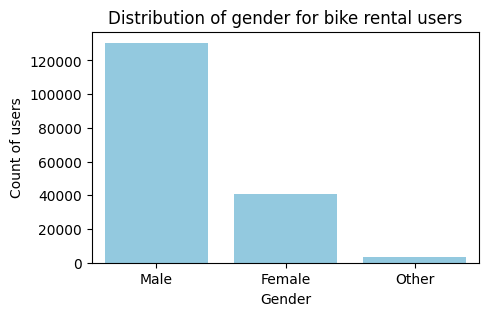

In [10]:
# Assign plot size
plt.figure(figsize = [5, 3]) 

# Define the desired order of categories
category_order = ['Male', 'Female', 'Other'] 

# Gender distribution of people renting bikes
sns.countplot(data=df, x='member_gender', order=category_order, color='skyblue')

# draw bar chart
plt.xlabel('Gender')
plt.ylabel('Count of users')
plt.title('Distribution of gender for bike rental users');

According to the graph, it can be seen that most of the users are males, followed by females. 

Next, we move on to investigate more about the rental duration for the bikes, to answer questions related to how long the users rent bikes for. Therefore, we construct a histogram for the rental duration and the count of users.


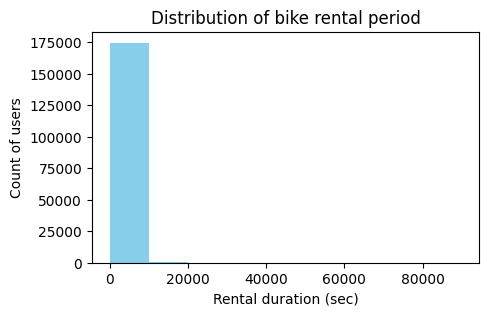

In [11]:
# Assign plot size
plt.figure(figsize = [5, 3]) 

# investigate about renting duration
bins = np.arange(0, df['duration_sec'].max()+10000, 10000)

# Plot the histogram 
plt.hist(data=df, x='duration_sec', bins=bins, color='skyblue')
plt.ylabel('Count of users')
plt.xlabel('Rental duration (sec)')
plt.title('Distribution of bike rental period');

From our preliminary analysis, we found that the rental period duration varies between 61 sec and 85444 sec. However, according to the above graph, the graph is skewed towards the left. Hence, most of the renters rent bikes for less than 10,000 sec.

To get a better understanding of the skewed data the data is transformed to log scale.


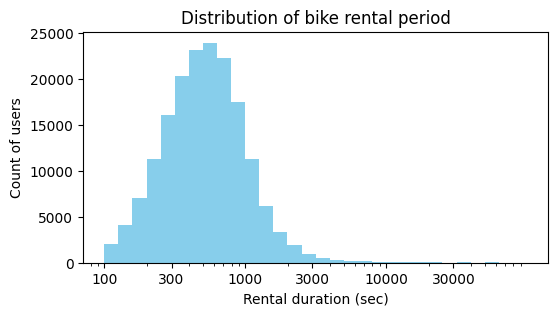

In [12]:
# Assign plot size
plt.figure(figsize = [6, 3])

# define bins
bins = 10 ** np.arange(2, 5+0.1, 0.1)

# Generate the x-ticks to be applied
ticks = [100, 300, 1000, 3000, 10000, 30000]

# Convert ticks into string values, to be displaye dlong the x-axis
labels = [f'{v}' for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_sec', bins=bins, color='skyblue')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels)

plt.xlabel('Rental duration (sec)')
plt.ylabel('Count of users')
plt.title('Distribution of bike rental period');


According to the Rental duration vs. count of users graph, it is clear that most users rent bikes for between 100 sec(~1.5min) to 3000 sec (50mins). Of which majority of rentals are for 300 sec (5 mins) to 1200 sec (20 mins).

Next, we look into the age distribution of the bike renters.

The minimum value of the member's birth year is found to be 1878, which is quite unlikely. This could be due to a typo or an error in the data. Therefore we will remove any entries with age > 80. To do so, the first step will be to find the age of the users using their birth years and remove those with a value > 80.


In [13]:
# Make new column containing the age of the users 
current_year = datetime.datetime.now().year 
df['Age'] = current_year - df['member_birth_year']

# Check for entries with Age>80 to find if it is a reasonable assumption
df_age_out = df.query('Age > 80')
df_age_out.shape

(263, 17)

Therefore, it will be a reasonable assumption to make that the  260+ entries with Age > 80 can be considered outliers from our 180,000+ dataset and taken out for our further analysis.

In [14]:
# Drop entires with Age>80
df.drop(df[df['Age'] > 80].index, inplace=True)

#Test
df.query('Age > 80')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age


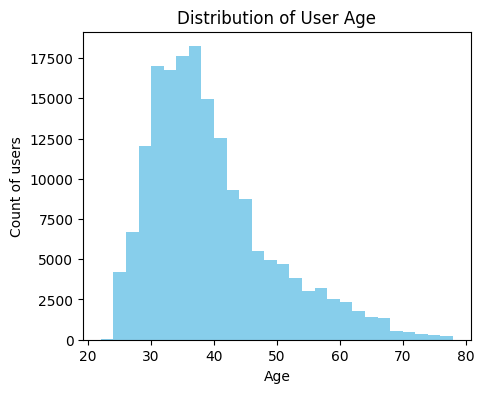

In [15]:
# Assign plot size
plt.figure(figsize = [5, 4])

# Define bins
bins = np.arange(22, 80, 2)

# Plot histogram for Age vs. count
plt.hist(data= df, x='Age', bins = bins, color='skyblue')

plt.xlabel('Age')
plt.ylabel('Count of users')
plt.title('Distribution of User Age');

The majority of the bike rental users are middle-aged between the ages of 30 and 45.

In the next section of the project, we try to find information about the bike rentals for the days of the week and the time of the day.

First, we extract information from the `start_time` to find the day of the week. Next, we plot a bar chart to look into the variation.


In [16]:
# Create a new column with the day of the week
df['start_day_of_week'] = df['start_time'].dt.day_name()


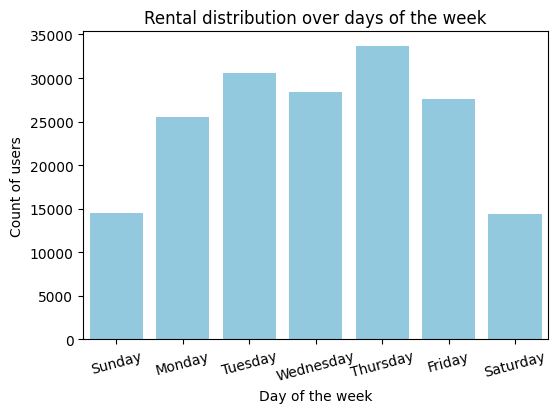

In [17]:
# Convert the "start_day_of_week" column from a plain object type into an ordered categorical type
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']
day_of_week = pd.CategoricalDtype(ordered=True, categories=days)
df['start_day_of_week'] = df['start_day_of_week'].astype(day_of_week);

# Assign plot size
plt.figure(figsize = [6, 4])

#Plot histogram
sns.countplot(data=df, x='start_day_of_week', color='skyblue')
plt.title('Rental distribution over days of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count of users')
plt.xticks(rotation=15);

According to this visualization, most of the users rent bikes during the weekdays and Thursdays are the most popular days for renting out bikes.

Next, to find information about the rental variation throughout the day we plot the distribution of users with the hour of the day. The time of the day data is found using the `start_time` of the dataset.


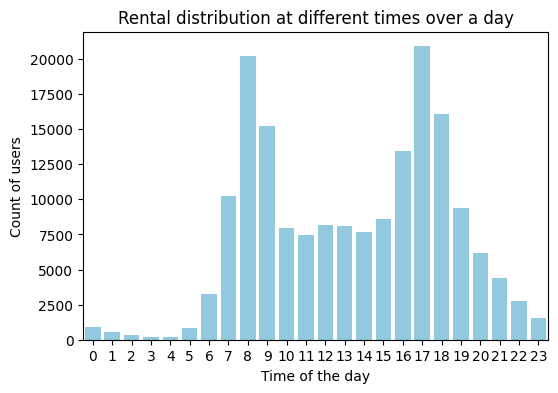

In [18]:
# Extract the time from the start_time column
df['hour_of_day'] = df['start_time'].dt.hour

# Assign plot size
plt.figure(figsize = [6, 4])

# Plot histogram
sns.countplot(data=df, x='hour_of_day', color='skyblue')
plt.title('Rental distribution at different times over a day')
plt.xlabel('Time of the day')
plt.ylabel('Count of users');

The bar plot for the Time of the day vs. Count shows a bimodal distribution, where there are demand peaks around 8 am and 5 pm. According to the bar plot, there is very little demand for bike rentals in the night between midnight and 5 am.

Finally, for this section, we look into the variation of users according to the start station and end station of rides. From this analysis, we hope to find what stations are the most popular stations for starting and ending bike rentals.

In [19]:
# Calculate frequencies of unique values
# Define a functin to find value count
def val_count(x):
    freq_count = x.value_counts()
    top_freq = freq_count.head(20)
    return top_freq

# Select top 20 most frequent values 
top_10_frq_start = val_count(df['start_station_id'])
top_10_frq_end = val_count(df['end_station_id'])


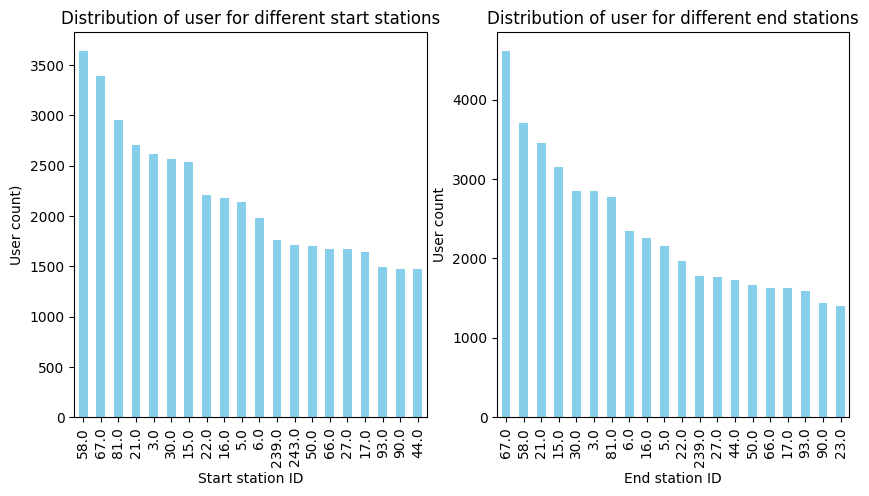

In [20]:
# Assign plot size
plt.figure(figsize = [10, 5]) 

# Draw subplot 1
plt.subplot(1,2,1)
# Box plot
top_10_frq_start.plot(kind='bar', color='skyblue')
plt.title('Distribution of user for different start stations')
plt.xlabel('Start station ID')
plt.ylabel('User count)')
#plt.ylim([0,3000])

# Draw subplot 1
plt.subplot(1,2,2)
# Box plot
top_10_frq_end.plot(kind='bar', color='skyblue')
plt.title('Distribution of user for different end stations')
plt.xlabel('End station ID')
plt.ylabel('User count');
#plt.ylim([0,3000]);

According to our results, Stations 21, 58, and 67 are the most popular bike stations for both the start and end of rides. Other stations, 81, 21, 3, 30, 15, 16, and 5 are also reported in the top 10 in both the starting and ending categories.

### Discuss the distribution(s) of your variable(s) of interest. 

The majority of bike rental users are male, followed by female users. Most rentals are for less than 10,000 seconds, with the predominant rental durations ranging from approximately 100 seconds (1.5 minutes) to 3,000 seconds (50 minutes). Specifically, the most common rental periods fall between 300 seconds (5 minutes) and 1,200 seconds (20 minutes). The majority of bike rental users are middle-aged, typically between 30 and 45 years old. Rentals are most frequent on weekdays, with Thursdays being the peak day. There are notable spikes in demand around 8 a.m. and 5 p.m., compared to other times of the day. Stations 21, 58, and 67 are the most popular for both starting and ending bike rides, while stations 81, 3, 30, 15, 16, and 5 also feature prominently among the top 10 in both starting and ending classifications.

### Of the features you investigated, were there any unusual distributions? Were there any unusual points? Did you need to perform any transformations? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The rental period values were largely skewed toward the left. Therefore, they were transformed into a log scale. This helped us to get a clearer visualization of the bar chart. From our analysis, we found that some entries had the birth year as 1878, which was very unlikely to occur. Thus, we removed all entries where the age > 80. Afterward, it was required to extract date and time data separated from the start_time column. We saw a bimodal distribution for the time vs. rental frequency distribution.

## 2. Bivariate Exploration

In this part, we look into the relationships between pairs of variables in the bike rental data set.

First, we look into any relationships we can find between (a) `user_type` (b) `gender` and the rental duration. Here we use bar plots for the distribution in rental duration.

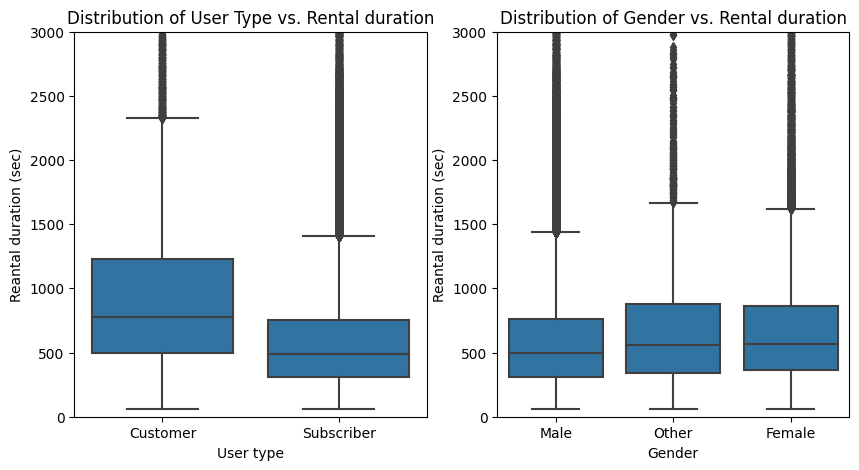

In [21]:
# Assign plot size
plt.figure(figsize = [10, 5]) 

# Draw subplot 1
plt.subplot(1,2,1)
# Box plot
sns.boxplot(data=df, x='user_type', y='duration_sec', color='tab:blue')
plt.title('Distribution of User Type vs. Rental duration')
plt.xlabel('User type')
plt.ylabel('Reantal duration (sec)')
plt.ylim([0,3000])

# Draw subplot 1
plt.subplot(1,2,2)
# Box plot
sns.boxplot(data=df, x='member_gender', y='duration_sec', color='tab:blue')
plt.title('Distribution of Gender vs. Rental duration')
plt.xlabel('Gender')
plt.ylabel('Reantal duration (sec)')
plt.ylim([0,3000]);

From the above visualizations, it is seen that there are quite several outliers in the dataset for the gender and user type categories. Thus, the variation in the data is large. The average rental duration for customers is greater compared to subscribers as depicted in the box plot. Hence on average, the customers are renting the bikes for a longer duration compared to subscribers. On the other hand, as seen in the second box plot, there is no significant change in the average values for the rental duration according to the genders.

Next, we look at the relationship between the rental time and the rental duration for 2-user types. We use a scatter plot to do so.


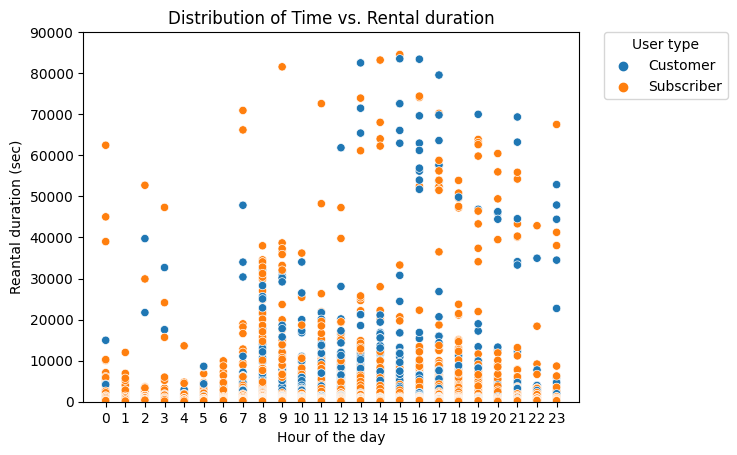

In [22]:
# create scatter plot
sns.scatterplot(data=df, x='hour_of_day', y='duration_sec', hue='user_type')

plt.title('Distribution of Time vs. Rental duration')
plt.xlabel('Hour of the day')
plt.xticks(ticks=np.arange(0, 24, 1))
plt.ylabel('Reantal duration (sec)')
plt.ylim(0.0,90000)

# Adding legend outside the plot area
plt.legend(title='User type', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

As seen in the above scatter plot, there are fewer users renting bikes between late night and 6 am. And mostly the subscribers are using rentals for short durations. Though the overall count of customers renting bikes is less, they rent bikes for a considerable long time.

Afterward, we look into the distribution of rental duration according to the time of the day for the two user types.

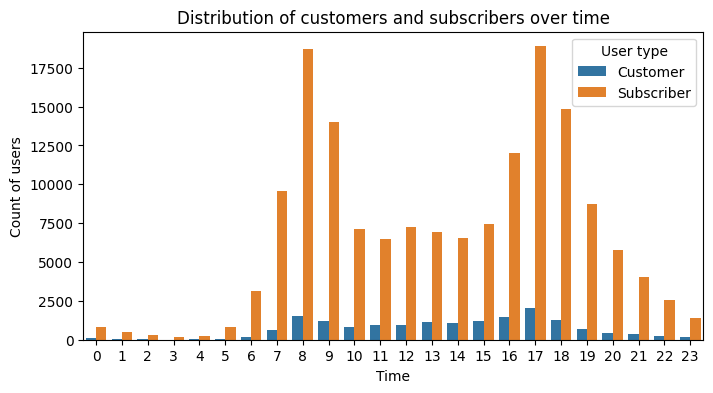

In [23]:
# Assign plot size
plt.figure(figsize = [8, 4]) 

# create clustered bar chart
#df['date'] = df['start_time'].dt.time
sns.countplot(data=df, x='hour_of_day', hue='user_type')
plt.title('Distribution of customers and subscribers over time')
plt.xlabel('Time')
plt.ylabel('Count of users')
plt.legend(title='User type');

As seen in the clustered bar chart, the frequency in the number of customers' rentals is less compared to the subscribers. Overall the pattern shown for both the user types is the same, i.e. a bimodal distribution over the day.

Finally, for this section, we hope to see any relationships between the start point and end point for the bike rentals by constructing a scatter plot.


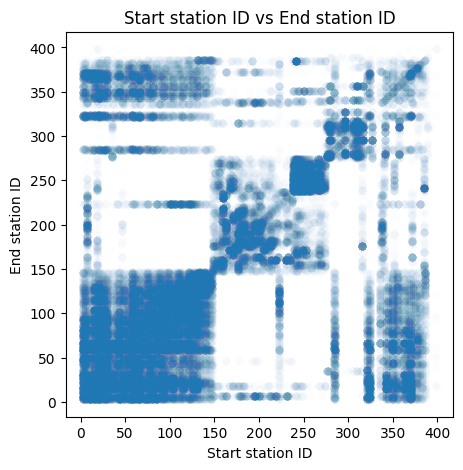

In [24]:
# Assign plot size
plt.figure(figsize = [5,5])

# Construct scatter plot for stations 3-398
sns.scatterplot(data=df, x='start_station_id', y='end_station_id', alpha=1/100)
plt.title('Start station ID vs End station ID')
plt.xlabel('Start station ID')
plt.ylabel('End station ID');

According to the graph, some patterns could be identified between the start stations and end stations. Customers starting their journey from station ID 3-150, tends to end their journey from either stations 3 - ~150 or ~340-398. And those who start their journey between stations ~150 - ~300, tend to end their journey within the same section. Finally, those who start their journey in stations ~340 onwards tend to end their journey either in the same section or between 3 - ~ 150.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the observations, it was seen that there was no effect by gender on the rental duration, but out of the user types, customers, tend to have a longer rental period on average. Both customers and subscribers showed the same pattern in renting out at different times during the day. Even, the actual number of customers was less compared to subscribers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We saw that the rental duration had a vast variation in their numbers according to the user type and gender. We show a relationship between some start stations and end stations. 

## 3. Multivariate Exploration

In this part of the project, we investigate our data for 3 or more variables for the visualizations.

As the initial analysis for this section, we constructed a facet plot with the variables, customer type, day of the week, and hour of the day, to see the change in the frequencies.


<Figure size 1500x3000 with 0 Axes>

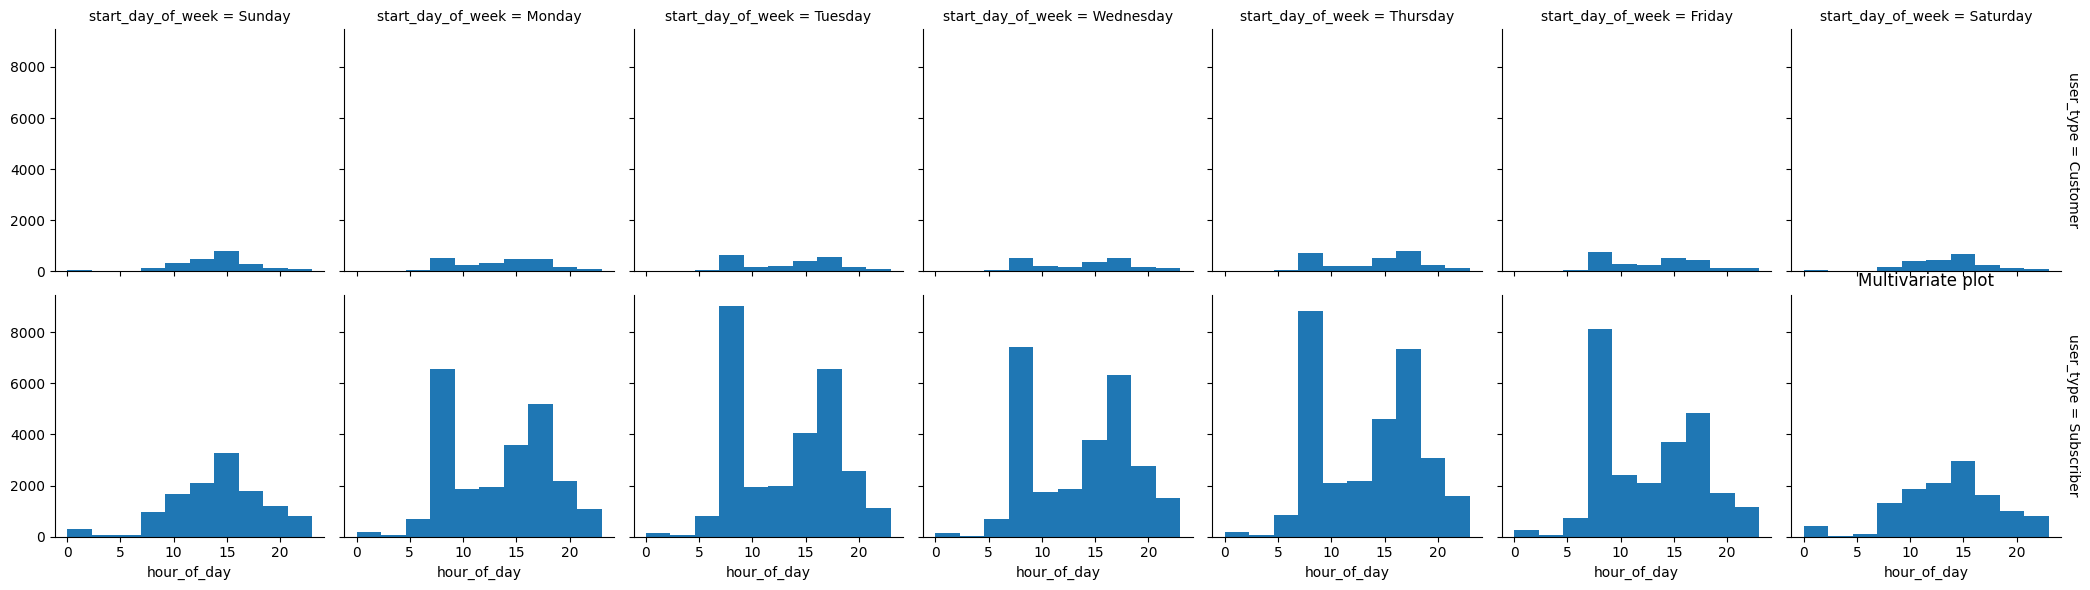

In [25]:
# Assign plot size
plt.figure(figsize = [15,30]);

# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data=df, row='user_type', col='start_day_of_week', margin_titles=True)
g.map(plt.hist, 'hour_of_day')
plt.title('Multivariate plot');

The facet plot can demonstrate to us the variation in the customer type, day of the week, hour of the day, and their frequencies at the same time. This makes it easier to look at the data together for comparison.

As seen in the previous sections of the project the number of users is more for weekday mornings and after-work work hours compared to the weekends, and of them most renters are subscribers.

In the next section we a scatter plot, with multiple encodings to check the variation of the Renter's age, rental duration, and time of the day.

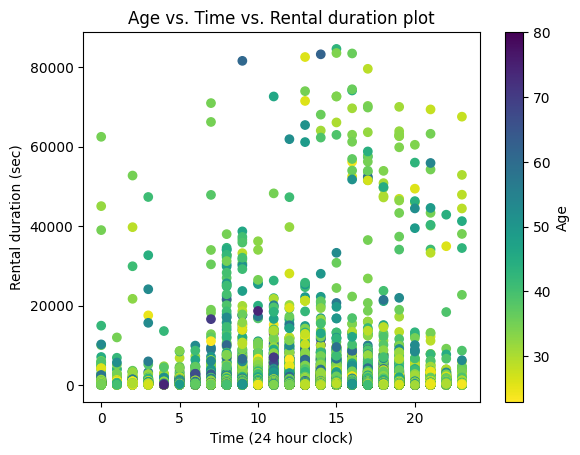

In [26]:
# plot scatter plot with color encoding
plt. scatter(data=df, x='hour_of_day', y='duration_sec', c='Age', cmap='viridis_r')
plt.title('Age vs. Time vs. Rental duration plot')
plt.xlabel('Time (24 hour clock)')
plt.ylabel('Rental duration (sec)')
cbar = plt.colorbar(label='Age');


This is an extension of the results we found in the univariate analysis, where we found that most renters are between the ages of 30-45. According to the scatter plot, we can see that most of the senior-aged renters use bikes for shorter durations and in the early morning hours of the day. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

We saw similar findings to strengthen the results seen in the univariate section of the project the number of users is more for weekday mornings and after-work work hours compared to the weekends, and of them most renters are subscribers.


### Were there any interesting or surprising interactions between features?

In this section, we saw that most of the senior-aged renters use the bikes for shorter durations and in the early morning hours of the day.


## Conclusions

### Write a summary of the main findings



Following are some important finding of the analysis as a result of our investigation into the bike share dataset.

1. *Gender Distribution*: The majority of bike rental users are male, followed by female users.
2. *Rental Duration*: Most rentals are for less than 10,000 seconds. Within this range, the majority of users rent bikes for durations between approximately 100 seconds (1.5 minutes) and 3,000 seconds (50 minutes). Specifically, the most common rental durations are between 300 seconds (5 minutes) and 1,200 seconds (20 minutes).
3. *Age Group*: The predominant age group of bike rental users is middle-aged, typically between 30 and 45 years old.
4. *Rental Timing*: Bike rentals are most frequent on weekdays, with Thursdays being the peak day. Rental demand shows notable peaks around 8 a.m. and 5 p.m., compared to other times of the day.
5. *Popular Stations*: Stations 21, 58, and 67 are the most popular for both starting and ending bike rides. Additionally, stations 81, 3, 30, 15, 16, and 5 are frequently listed among the top 10 for both starting and ending rides. 
6. *Outliers and Data Variation*: The dataset contains numerous outliers in the gender and user type categories, indicating significant variation. The average rental duration is longer for customers compared to subscribers, as shown in the box plot. This suggests that, on average, customers rent bikes for longer periods than subscribers. Conversely, the box plot does not reveal a significant difference in average rental duration between genders.
7. *User Type Patterns*: Subscribers rent bikes more frequently but for shorter durations compared to customers. Despite a lower overall count, customers tend to rent bikes for considerably longer periods.
8. *Rental Patterns by Station*: Customers who start their journey at stations between IDs 3 and 150 often end their trip at either the same stations or at stations between 340 and 398. Those starting between stations 150 and 300 typically end their journey within the same range. Lastly, users starting at stations 340 or beyond generally end their trips either at the same range or between stations 3 and 150.

### Reflect on the steps taken during the data exploration


Initially, we conducted a preliminary analysis to understand the scope of the dataset, including its size, the fields present, value ranges, missing values, and data types. Our initial review revealed that the dataset spans from February 2019 to March 2019 and comprises 183,412 entries across 16 columns. We proceeded with data cleaning to address any missing values and to convert start and end times into datetime format. This enabled us to explore how factors such as age, gender, rental duration, start and end stations, day of the week, and time of day influence the data distribution. In the bivariate analysis, we created a box plot to examine the relationship between user type and gender with rental duration. We then analyzed the relationship between rental time and rental duration for both customers and subscribers, and assessed the distribution of rental duration by time of day for these user types. Additionally, we explored the correlation between start and end points of bike rentals using a scatter plot. In the multivariate analysis, we constructed a facet plot to observe changes in rental frequencies based on customer type, day of the week, and hour of the day, and created a scatter plot with multiple encodings to investigate the variations in renter age, rental duration, and time of day.